# Micrograd 

Este notebook está basado en el video **"[The spelled-out intro to neural networks and backpropagation: building micrograd](https://youtu.be/VMj-3S1tku0?si=VUGvwhSh3fSfze5d)"**, donde explica el **backpropagation** (la mejor clase práctica, oro puro!).

# **1. Value Class**

Esta clase nos permitirá visualizar y computar el grafo para realizar el backpropagation. En términos simples, permite almacenar un valor escalar y su gradiente.

## **1.1 Value()**

In [7]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data 
        self._prev = set(_children)
        self._op = _op # Nos permite saber si es una suma o multiplicación
        self.label = label # Permite añadir una etiqueta al valor y poder mostrarlo en el grafo
    
    # Este método mágico permite mostrar por pantalla visualizar el valor asignado a la instancia
    def __repr__(self):
        return f"Value(data={self.data})"
    
    # Este método permite sumar clases del mismo tipo
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    # Este método permite multiplicar clases del mismo tipo
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out 

* **_nombreVariable:** El guión bajo hace referencia de que la variable será un atributo privado, es decir, que no se puede acceder desde afuera al atributo.

In [2]:
a = Value(-2.0)
b = Value(-3.0)

In [3]:
c = a * b
c

Value(data=6.0)

In [19]:
c._prev

{Value(data=-2.0), Value(data=-3.0)}

In [22]:
c._op

''

## **1.2 Graphviz**

Para instalar **Graphviz** en windows se debe realizar del ejecutable ([página oficial](https://graphviz.org/download/)) y seleccionar el PATH "Add Graphviz to system PATH for all users".

In [10]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))

        dot.node(name=uid, label='{ %s | data %.4f}' % (n.label, n.data, ), shape='record')

        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

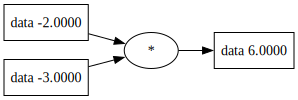

In [5]:
draw_dot(c)

In [25]:
c = a * b
d = c + a
d._op

'+'

## **1.3 Value Object y Visualización**

In [16]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

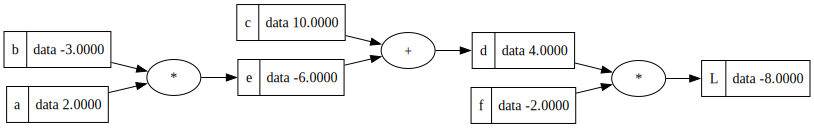

In [17]:
draw_dot(L)

### **1.3.1 Calcular la derivada de cada nodo**

A continaución, se calculará la derivada de cada nodo con respecto a L. Se realizarán los siguientes procedimientos:

1. Calcular la derivada de L con respecto a L ($\frac{\mathrm{d}' L}{\mathrm{d} L}$).
2. Calcular la derivada de ($\frac{\mathrm{d}' L}{\mathrm{d} f}$).
3. Calcular la derivada de ($\frac{\mathrm{d}' L}{\mathrm{d} d}$).
4. Calcular la derivada de ($\frac{\mathrm{d}' L}{\mathrm{d} e}$).
5. Calcular la derivada de ($\frac{\mathrm{d}' L}{\mathrm{d} c}$).
6. Calcular la derivada de ($\frac{\mathrm{d}' L}{\mathrm{d} b}$).
7. Calcular la derivada de ($\frac{\mathrm{d}' L}{\mathrm{d} a}$).


Recordemos la definición de límite:

$$
f'(x) = \lim\limits_{h\rightarrow 0}\frac{f(x+h) - f(x)}{h}
$$